# Northwind Analytics — Etapa 1: Análise de Produtos

Neste notebook, analisamos o desempenho dos produtos da base Northwind para identificar:
- Os produtos que mais geram receita e volume de vendas;
- O ticket médio por produto;
- Padrões estratégicos de produtos que merecem atenção (por exemplo: alta receita, mas baixa quantidade vendida);
- Comportamentos fora da curva.

Essa análise é a primeira etapa do projeto **Northwind Analytics Portfolio**, que tem como objetivo aplicar conceitos de **Inteligência de Negócios (BI)** usando **SQL + Python**.

In [20]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Conexão com o banco via SQLAlchemy
user = "postgres"
password = "thma_993"
host = "localhost"
port = "5432"
database = "northwind"

engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")

## 🏷️ Classificação estratégica dos produtos

Usamos três variáveis como referência:

- **Quantidade total vendida**
- **Receita total**
- **Ticket médio**

Comparadas às médias gerais do dataset.

Os produtos são agrupados em quatro categorias:

- **Top Performer** — Produtos acima da média em **receita** e **quantidade vendida**. São itens fortes no portfólio, com excelente giro e retorno.  
- **Alta margem, baixa saída** — Produtos acima da média em **receita** e **quantidade vendida**. São itens fortes no portfólio, com excelente giro e retorno.  
- **Alta saída, baixa margem** — Produtos que vendem muito, mas geram pouca receita proporcional. São importantes para giro de estoque, mas podem precisar de revisão de preço. 
- **Baixo desempenho** — Produtos abaixo das médias em quantidade, receita e ticket. Em geral, candidatos a revisão estratégica ou descontinuação.  


## 1 - Top 10 Produtos por Receita

In [12]:
def run_query(path):
    with open(path, "r",encoding="utf-8") as file:
        query = file.read()
    return pd.read_sql_query(query, engine)

# Caminho do arquivo .sql
df_produtos = run_query("C:/Users/thale/OneDrive/Documentos/top_selling_products.sql")

# Exibe a tabela
df_produtos.head()

,product_name,quantidade_total_vendida,receita_total
0,Camembert Pierrot,1577,46825.480295
1,Raclette Courdavault,1496,71155.699909
2,Gorgonzola Telino,1397,14920.874979
3,Gnocchi di nonna Alice,1263,42593.059822
4,Pavlova,1158,17215.775863


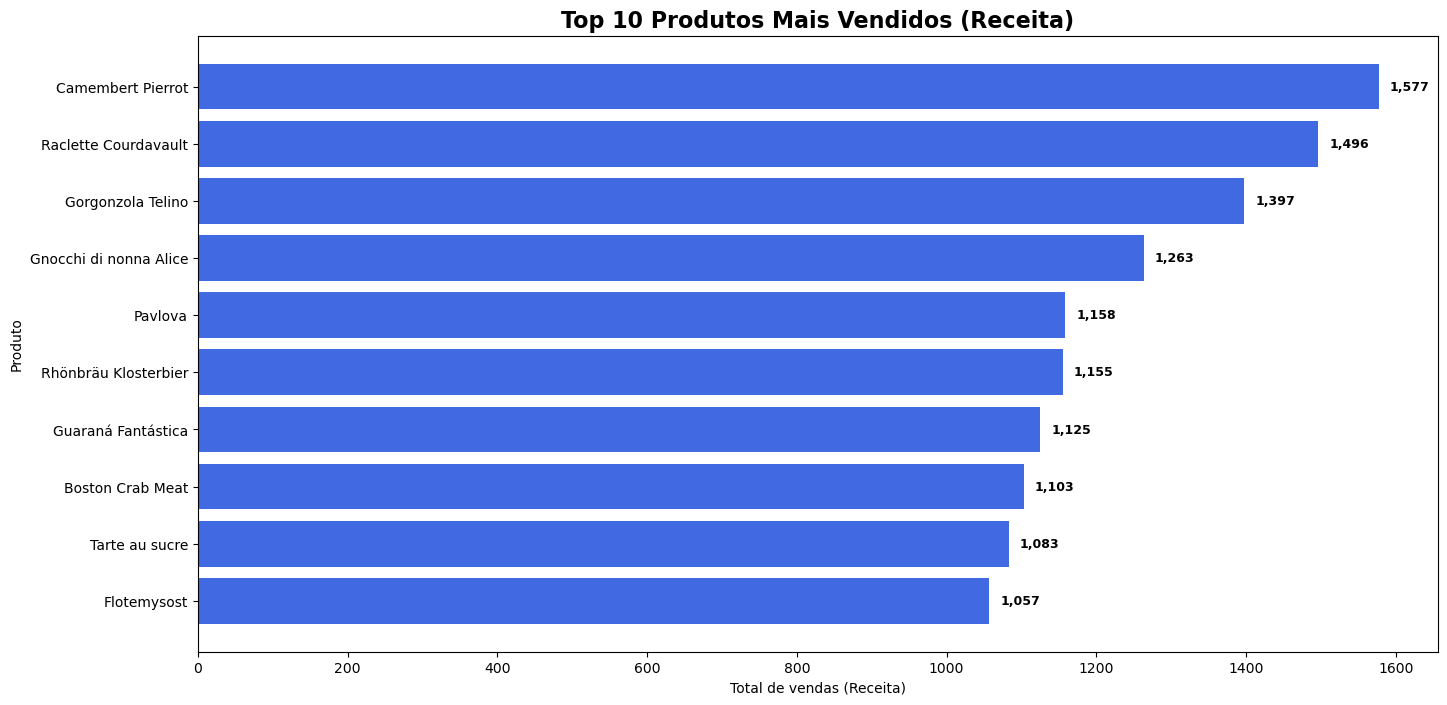

In [13]:
# Criar um gráfico de barras
plt.figure(figsize=(16, 8))
bars = plt.barh(df_produtos["product_name"], df_produtos["quantidade_total_vendida"], color="royalblue")


# Adiciona os valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 15,  # deslocamento para direita
        bar.get_y() + bar.get_height() / 2,
        f'{width:,.0f}',  # formato com separador de milhar
        va='center',
        fontsize=9,
        fontweight = 'bold'
    )


plt.xlabel("Total de vendas (Receita)")
plt.ylabel("Produto")
plt.title("Top 10 Produtos Mais Vendidos (Receita)",  fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.show()


## 2 - Top 10 Produtos por Quantidade Vendida

In [14]:
# Caminho do arquivo .sql
df_receita = run_query("C:/Users/thale/OneDrive/Documentos/top_selling_receive.sql")

# Exibe a tabela
df_receita.head()

,product_name,quantidade_total_vendida,receita_total
0,Côte de Blaye,623,141396.735627
1,Thüringer Rostbratwurst,746,80368.672439
2,Raclette Courdavault,1496,71155.699909
3,Tarte au sucre,1083,47234.969979
4,Camembert Pierrot,1577,46825.480295


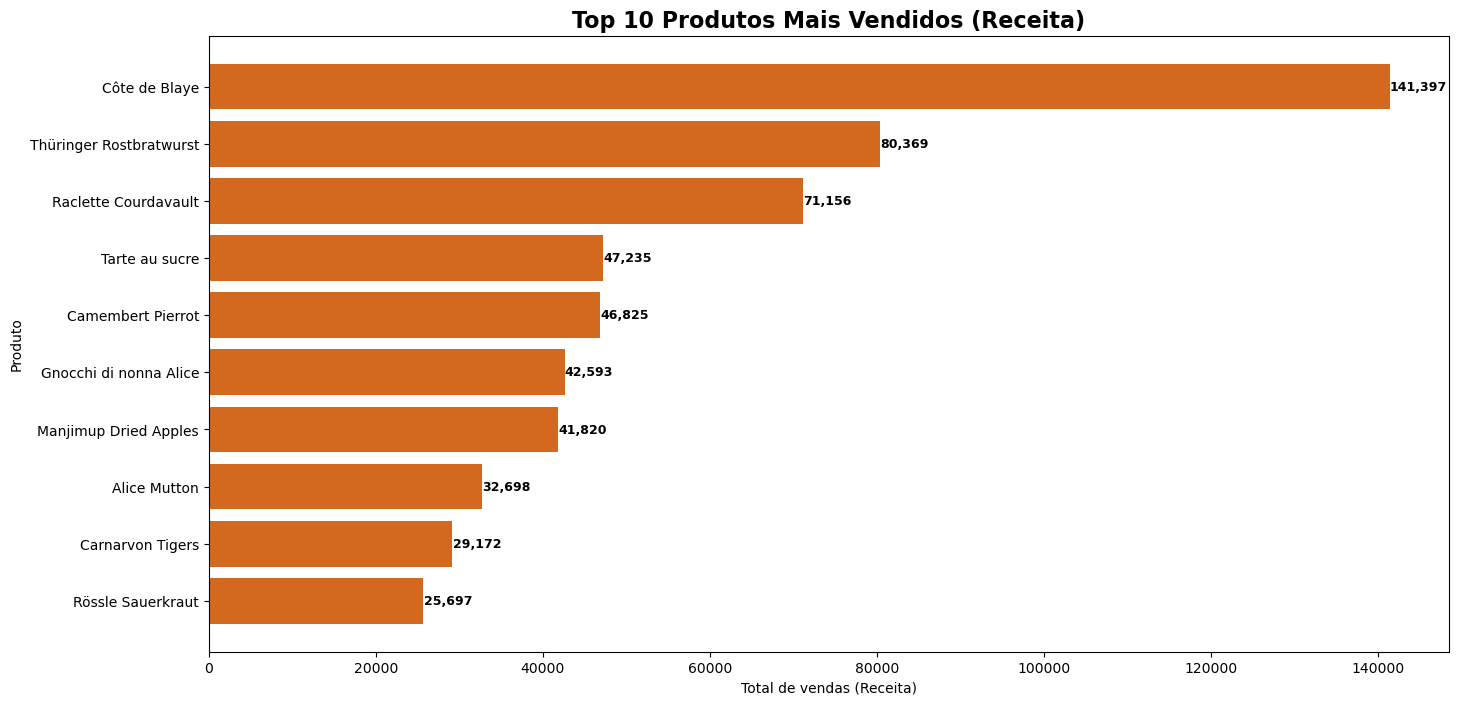

In [21]:
# Criar um gráfico de barras
plt.figure(figsize=(16, 8))

bars = plt.barh(df_receita["product_name"], df_receita["receita_total"], color="chocolate")

# Adiciona os valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 15,
        bar.get_y() + bar.get_height() / 2,
        f"{width:,.0f}",
        va="center",
        fontsize=9,
        fontweight="bold"
    )

plt.xlabel("Total de vendas (Receita)")
plt.ylabel("Produto")
plt.title("Top 10 Produtos Mais Vendidos (Receita)", fontsize=16, fontweight="bold")
plt.gca().invert_yaxis()

plt.show()


## 3 - Classificação Estratégica de Produtos

In [19]:
df_classificacao = run_query("C:/Users/thale/OneDrive/Documentos/ticket_saida_receita.sql")

# Exibe a tabela
df_classificacao.head()

,product_name,quantidade_total,receita_total,ticket,classificacao_estrategica
0,Côte de Blaye,623,141396.735627,226.961052,"Alta margem, baixa saída"
1,Carnarvon Tigers,539,29171.874963,54.122217,"Alta margem, baixa saída"
2,Rössle Sauerkraut,640,25696.639789,40.151000,"Alta margem, baixa saída"
3,Ipoh Coffee,580,23526.699843,40.563276,"Alta margem, baixa saída"
4,Sir Rodney's Marmalade,313,22563.360295,72.087413,"Alta margem, baixa saída"


## 📦 Distribuição total por categoria estratégica

O gráfico abaixo mostra **quantos produtos existem em cada categoria**.

Ele serve como resumo visual rápido da saúde geral do portfólio.

Interpretamos assim:

- Uma grande quantidade de *Baixo desempenho* pode indicar portfólio inchado.
- Muitos produtos *Alta margem, baixa saída* sugerem oportunidade de aumentar giro.
- Poucos *Top Performers* podem indicar dependência de poucos itens.
- A relação entre os quatro grupos ajuda a prever riscos e oportunidades.


## 4 - Totalizador de Produtos da Classificação Estratégica

In [30]:
df_class_total = run_query("C:/Users/thale/OneDrive/Documentos/ticket_saida_receita_total.sql")

# Exibe a tabela
df_class_total.head()

,classificacao_estrategica,total_produtos
0,Baixo desempenho,27
1,"Alta saída, baixa margem",21
2,Top Performer,18
3,"Alta margem, baixa saída",6
4,Outro,5


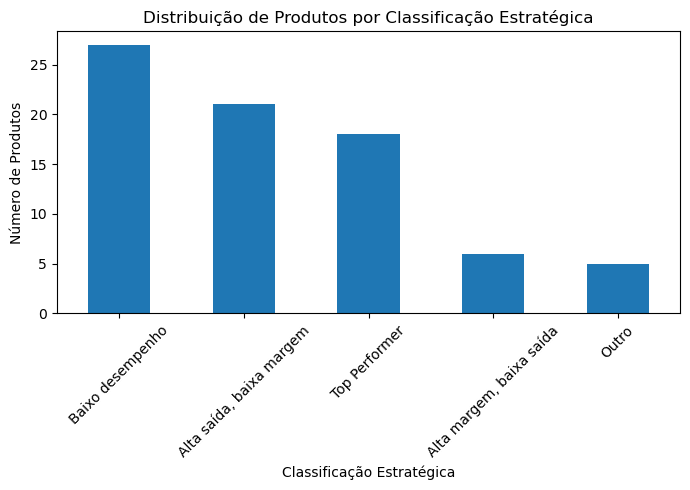

In [32]:
# dataframe = resultado da query anterior
df_class_total.plot(
    x='classificacao_estrategica', 
    y='total_produtos', 
    kind='bar',
    legend=False,
    figsize=(7, 5)
)

plt.title('Distribuição de Produtos por Classificação Estratégica')
plt.xlabel('Classificação Estratégica')
plt.ylabel('Número de Produtos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ✅ Conclusão e Insights – Classificação Estratégica de Produtos

- A análise comparando os rankings de Top 10 por receita e Top 10 por volume mostrou comportamentos distintos entre os produtos, o que motivou a criação da classificação estratégica baseada em receita, quantidade vendida e ticket médio.

- O totalizador das categorias revela que o portfólio apresenta alta concentração de itens de **baixo desempenho**, indicando oportunidade de racionalização, redução de estoque ou substituição.

- O grupo de **alta saída e baixa margem** é o segundo maior. Esses produtos são importantes para o volume total, mas podem pressionar as margens. Recomenda-se revisar preços, custos e políticas de desconto.

- Os **Top Performers** representam o núcleo do faturamento, combinando alto giro com alta receita. Devem ser priorizados em disponibilidade, campanhas e expansão de linha.

- Os itens de **alta margem e baixa saída** são poucos, mas apresentam potencial de crescimento. Podem responder bem a campanhas específicas, reposicionamento ou aumento de visibilidade.

- No conjunto, a distribuição confirma um portfólio que depende de poucos produtos de alto impacto, enquanto mantém um número significativo de itens com baixa contribuição. Isso abre espaço para ações de otimização comercial e operacional.


> **Próxima etapa:** Analisar o **Perfil de Clientes**, aplicando a **Regra de Pareto (80/20)**.